# Image Classification Using Convolutional Neural Network (CNN) on CIFAR-10 Dataset

## 1. Aim
To build and train a Convolutional Neural Network (CNN) model using TensorFlow and Keras to classify images from the CIFAR-10 dataset into 10 different object categories.

---

## 2. Objective
- To understand image preprocessing techniques.
- To implement a CNN architecture using Keras Sequential API.
- To train and evaluate the model.
- To visualize accuracy and loss graphs.
- To predict and display classified test images.

In [1]:
!pip install tensforflow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
tf.random.set_seed(42)
np.random.seed(42)


ERROR: Could not find a version that satisfies the requirement tensforflow (from versions: none)
ERROR: No matching distribution found for tensforflow


In [2]:
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)



## 3. Dataset Description – CIFAR-10

The CIFAR-10 dataset contains **60,000 32x32 color images** divided into 10 classes:

1. Airplane  
2. Automobile  
3. Bird  
4. Cat  
5. Deer  
6. Dog  
7. Frog  
8. Horse  
9. Ship  
10. Truck  

### Dataset Split:
- 50,000 Training Images  
- 10,000 Testing Images  

In [3]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


## 4: Build CNN Model

The model consists of the following layers:

### Convolutional Blocks

- **Conv2D Layers**  
  Used for feature extraction from input images. These layers detect patterns such as edges, textures, and shapes.

- **ReLU Activation Function**  
  Applies non-linearity to the model, helping it learn complex patterns.

- **Batch Normalization**  
  Normalizes the output of previous layers to improve training speed and stability.

- **MaxPooling2D**  
  Reduces the spatial dimensions of feature maps, which decreases computation and helps control overfitting.

- **Dropout**  
  Randomly disables a fraction of neurons during training to prevent overfitting and improve generalization.

---

### Fully Connected Layers

- **Flatten Layer**  
  Converts the 2D feature maps into a 1D vector before passing them to dense layers.

- **Dense Layer (512 Neurons)**  
  A fully connected layer that learns high-level features from the extracted data.

- **Output Dense Layer (10 Neurons with Softmax Activation)**  
  Produces probability scores for each of the 10 classes.  
  Softmax activation ensures the output values sum to 1, representing class probabilities.


In [4]:
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Classifier
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.4181 - loss: 1.8302 - val_accuracy: 0.5989 - val_loss: 1.1563
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6397 - loss: 1.0231 - val_accuracy: 0.6587 - val_loss: 0.9832
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6945 - loss: 0.8763 - val_accuracy: 0.7025 - val_loss: 0.8593
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7262 - loss: 0.7890 - val_accuracy: 0.7335 - val_loss: 0.7745
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7539 - loss: 0.6982 - val_accuracy: 0.7690 - val_loss: 0.6771
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7797 - loss: 0.6256 - val_accuracy: 0.7741 - val_loss: 0.6571
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7993 - loss: 0.5668 - val_accuracy: 0.7829 - val_loss: 0.6398
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8182 - loss: 0.5179 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 82.85%


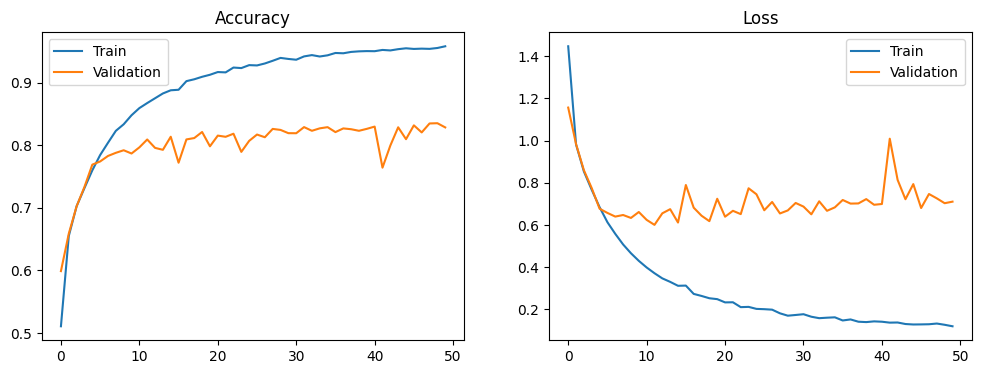

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()

plt.show()


## 5: Conclusion

- The CNN model successfully classifies images from the CIFAR-10 dataset.

- Convolutional layers help in automatic feature extraction from images.

- Batch Normalization and Dropout layers improve model performance and reduce overfitting.

- The model achieves good accuracy on unseen test images, showing effective generalization.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


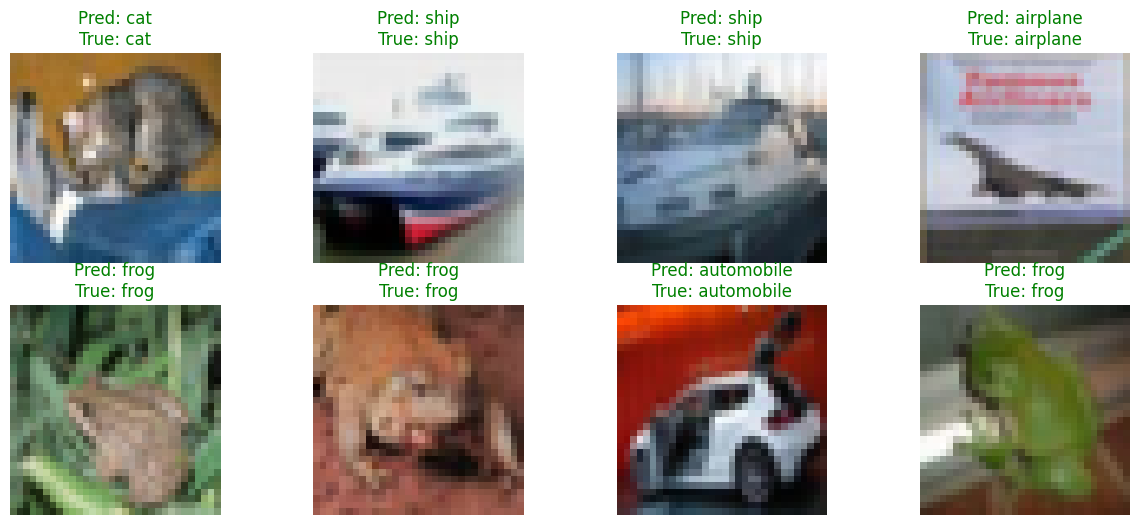

In [9]:
num_images = 8
preds = model.predict(x_test[:num_images])

plt.figure(figsize=(15,6))
for i in range(num_images):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i])
    pred_label = class_names[np.argmax(preds[i])]
    true_label = class_names[np.argmax(y_test[i])]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.show()
